In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set(style="ticks")

In [167]:
data = pd.read_csv('../data/flavors_of_cacao.csv')
data.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [168]:
data.shape[1]

9

### 1. Предварительная обработка

Удалим пустые значения:

In [169]:
data = data.dropna(axis=1, how='any')
data.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75
1,A. Morin,Kpime,1676,2015,70%,France,2.75
2,A. Morin,Atsane,1676,2015,70%,France,3.00
3,A. Morin,Akata,1680,2015,70%,France,3.50
4,A. Morin,Quilla,1704,2015,70%,France,3.50


In [170]:
data.shape[1]

7

Удостоверимся, что пропуски отсутствуют:

In [171]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Company - object - 0
Specific Bean Origin or Bar Name - object - 0
REF - int64 - 0
Review Date - int64 - 0
Cocoa Percent - object - 0
Company Location - object - 0
Rating - float64 - 0


Категориальные признаки:

In [172]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Company
Specific Bean Origin or Bar Name
Cocoa Percent
Company Location


Выполним кодирование:

In [173]:
le1 = LabelEncoder()
data['Company'] = le1.fit_transform(data['Company']);

In [174]:
le2 = LabelEncoder()
data['Specific Bean Origin or Bar Name'] = le2.fit_transform(data['Specific Bean Origin or Bar Name']);

In [175]:
le3 = LabelEncoder()
data['Cocoa Percent'] = le3.fit_transform(data['Cocoa Percent']);

In [176]:
le4 = LabelEncoder()
data['Company Location'] = le4.fit_transform(data['Company Location']);

Выполним проверку:

In [177]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Как видно, категориальных признаков не осталось

### 2. Разделение выборки на обучающую и тестовую

In [178]:
X = data.drop('Company', axis=1)
Y = data['Company']

In [179]:
X

,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating
0,14,1876,2016,13,18,3.75
1,492,1676,2015,20,18,2.75
2,67,1676,2015,20,18,3.00
3,15,1680,2015,20,18,3.50
4,809,1704,2015,20,18,3.50
...,...,...,...,...,...,...
1790,754,647,2011,20,3,3.75
1791,258,749,2011,15,3,3.00
1792,483,749,2011,15,3,3.50
1793,483,781,2011,12,3,3.25


In [180]:
Y

0         0
1         0
2         0
3         0
4         0
       ... 
1790    410
1791    410
1792    410
1793    410
1794    410
Name: Company, Length: 1795, dtype: int64

In [181]:
pd.DataFrame(X, columns=X.columns).describe()

,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,523.884680,1035.904735,2012.325348,21.711978,37.912535,3.185933
std,291.865907,552.886365,2.927210,6.640476,20.776392,0.478062
min,0.000000,5.000000,2006.000000,0.000000,0.000000,1.000000
25%,288.500000,576.000000,2010.000000,20.000000,18.000000,2.875000
50%,530.000000,1069.000000,2013.000000,20.000000,54.000000,3.250000
75%,765.500000,1502.000000,2015.000000,27.000000,56.000000,3.500000
max,1038.000000,1952.000000,2017.000000,44.000000,59.000000,5.000000


Разделим выборку на обучающую и тестовую:

In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(1346, 6), (449, 6)
(1346,), (449,)


### 3. Обучение моделей

#### 3.1 Линейная модель

In [194]:
SGD = SGDClassifier(max_iter=10000)
SGD.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [214]:
f1_score(Y_test, SGD.predict(X_test), average='micro')
precision_score(Y_test, SGD.predict(X_test), average='micro')

0.008908685968819599

#### 3.2. SVM

In [196]:
SVC = SVC(kernel='rbf')
SVC.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
f1_score(Y_test, SVC.predict(X_test), average='micro'))
precision_score(Y_test, SVC.predict(X_test), average='micro'))

#### 3.3. Дерево решений

In [198]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
f1_score(Y_test, DT.predict(X_test), average='micro'))
precision_score(Y_test, DT.predict(X_test), average='micro'))

Можно сделать вывод, что дерево решений дает лучший результат

#### Визуализация дерева

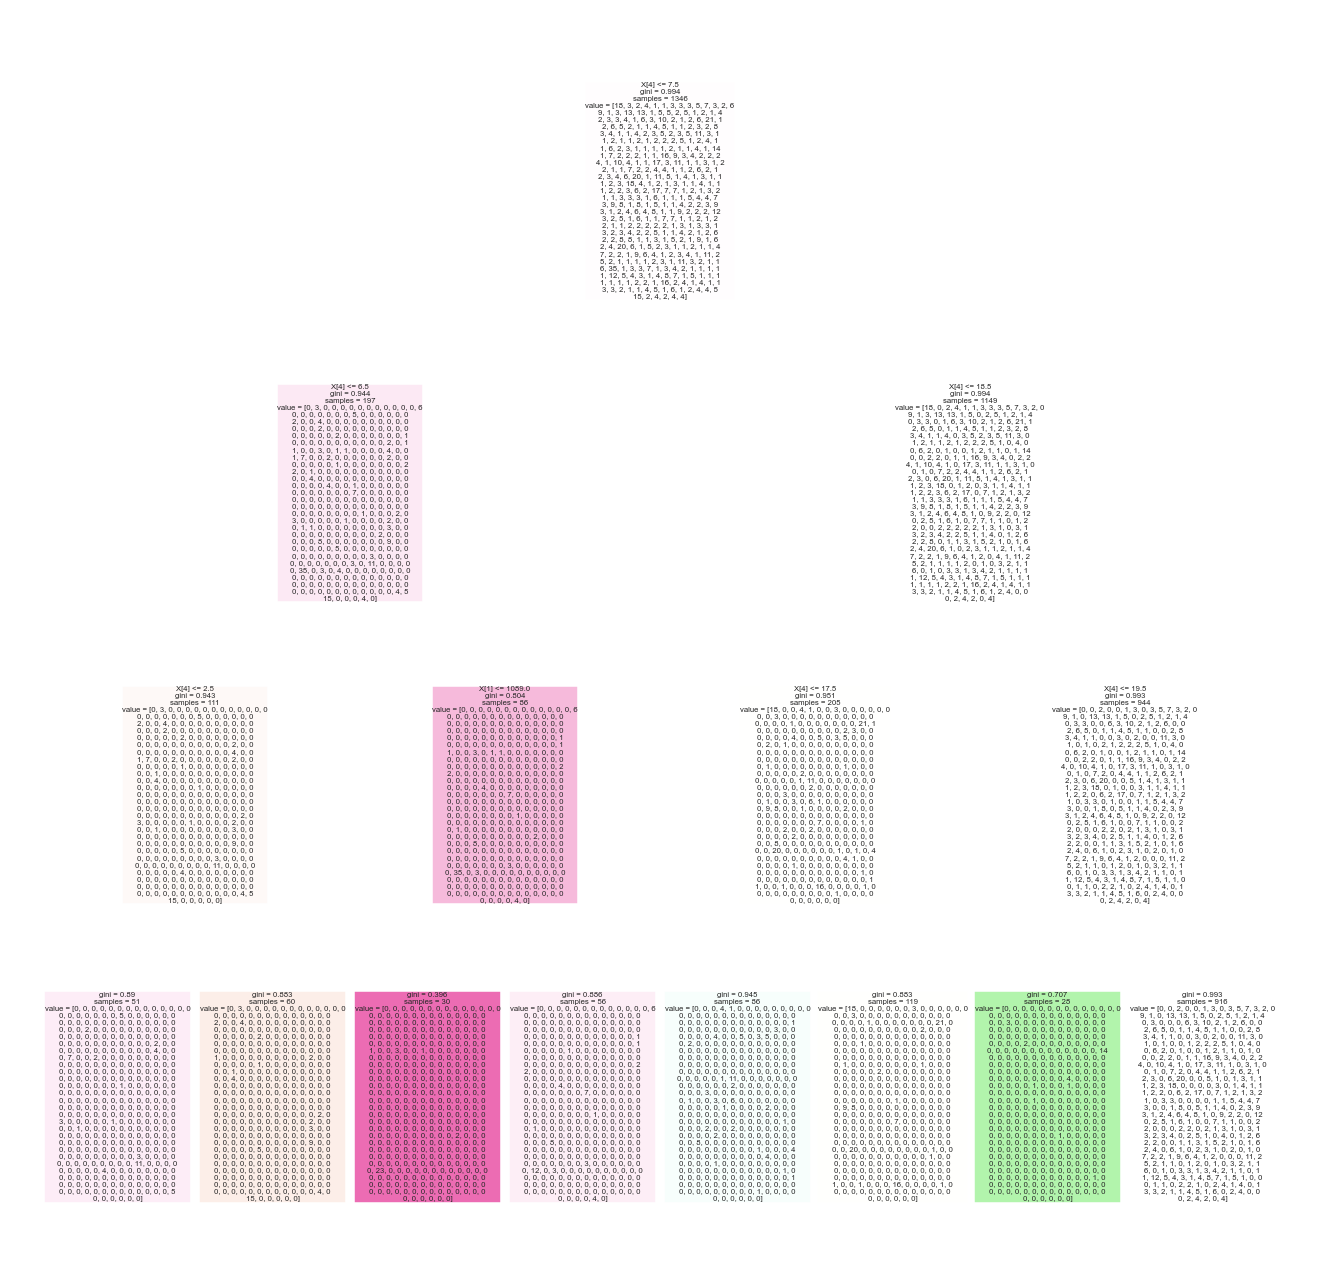

In [215]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train, Y_train)
tree.plot_tree(clf, filled = True);